## Group 56  
## Problem Statement Assignment_1_PS-3


## Contributors

1. xx
2. xx
3. xx
4. xx
5. xx

### Assignment_1_PS-3

NLP Assignment 1

General Instructions

Each group is expected to submit a jupyter notebook (.ipynb) and a pdf file of the same. 

Each output generated should be justified.

No extension on the deadline

Submissions using other python IDEs will not be considered for grading.




Perform the following tasks using the given dataset

Dataset : 


https://drive.google.com/file/d/1QS50opZIGIQ2TaiCNBk4z8pw_mypSibM/view?usp=sharing




(Consider the text column that represents a review in the dataset) 


Prepare the dataset for the algorithm by:

Cleaning: Removing punctuation, numbers, and special characters. Eliminating stop words.                    

Normalization: Reducing words to their base or root  form using stemming or lemmatization                                  (1M)

Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset.

(a) Determine the frequency of each POS tag across the entire dataset.

(b)Identify and present the top 10 most frequent POS tags and their respective frequencies.

(c) Analyze the common word combinations and patterns surrounding the most frequent POS tags (e.g., "adjective + noun", "verb + prepositional phrase").          (2 Marks)

Generate visualizations such as bar charts, word clouds to represent the POS tag frequencies                                 (2 Marks)

Display the HMM POS tagging on the first 4 rows of the dataset        (2 Marks)

a) Choose a subset of the dataset (e.g., a paragraph or a set of sentences) and apply both POS tagging and NER to this subset. 

(b) Create a table that displays each word in the subset along with its POS tag and NER tag (if applicable). 

(c) Identify the instances where POS tags and NER tags appear to contradict each other or provide mutually supportive information. Justify how these observed relationships can be leveraged to enhance the accuracy and depth of text analysis tasks                                               (3 Marks)





Justification of the output obtained for all the above tasks is mandatory



In [18]:
# Installation of nltk
# In Jupyter, the console commands can be executed by the ‘!’ sign before the command within the cell
!pip install nltk

In [19]:
#import nltk library for using its different functions
import nltk
import string
import re

# for loading the csv
import pandas as pd

# for remoning stopwords
from nltk.corpus import stopwords

In [20]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#  Sentence Tokenization  - Tokenizes sentences from text
from nltk.tokenize import sent_tokenize

# Word Tokenization  - Tokenizes words in sentences
from nltk.tokenize import word_tokenize



In [22]:
# Cleaning: Removing punctuation, numbers, and special characters. Eliminating stop words.  

def clean_dataset(text):
    if not isinstance(text, str): # Ensure the text is a string
        return ""
    
    # define stop words
    stop_words = set(stopwords.words('english'))

    # remove special characters, numbers and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # tokenize text
    words = nltk.word_tokenize(text)

    # remove stop words
    words = [word.lower() for word in words if word.lower() not in stop_words ]

    # join cleaned words
    return ' '.join(words)

In [23]:
# Normalization: Reducing words to their base or root  form using stemming or lemmatization 

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
# using omw-1.4 
# to improve lemmatization accuracy and handle nuanced linguictic cases
# to work with datasets in languages other than English
# to maintain compatibility with the latest featres of WordNet in NLTK
nltk.download('omw-1.4')

def normalize_dataset(text):
    lemmatizer = WordNetLemmatizer()

    # tokenize text
    words = nltk.word_tokenize(text)

    # lemmatize each word
    normalized_words = [ lemmatizer.lemmatize(word) for word in words ]

    # join normalised words
    return ' '.join(normalized_words)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [24]:
# Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset.
nltk.download('averaged_perceptron_tagger')

def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    return nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [25]:
# loading the dataset

data =  pd.read_csv('boston airbnb reviews.csv')
print(data.head())

   listing_id       id  reviewer_id reviewer_name  \
0     1178162  4724140      4298113       Olivier   
1     1178162  4869189      6452964     Charlotte   
2     1178162  5003196      6449554     Sebastian   
3     1178162  5150351      2215611        Marine   
4     1178162  5171140      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...  


In [26]:
# This model is essential for tokenizing text into sentences or words using NLTK
nltk.download('punkt')
nltk.download('punkt_tab')


# apply cleaning
data['cleaned_comments'] = data['comments'].apply(clean_dataset)

# apply normalisation
data['normalized_comments'] = data['cleaned_comments'].apply(normalize_dataset)

# display the updated dataset
print(data[['comments', 'cleaned_comments', 'normalized_comments']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                            comments  \
0  My stay at islam's place was really cool! Good...   
1  Great location for both airport and city - gre...   
2  We really enjoyed our stay at Islams house. Fr...   
3  The room was nice and clean and so were the co...   
4  Great location. Just 5 mins walk from the Airp...   

                                    cleaned_comments  \
0  stay islams place really cool good location mi...   
1  great location airport city great amenities ho...   
2  really enjoyed stay islams house outside house...   
3  room nice clean commodities close airport metr...   
4  great location mins walk airport station good ...   

                                 normalized_comments  
0  stay islam place really cool good location min...  
1  great location airport city great amenity hous...  
2  really enjoyed stay islam house outside house ...  
3  room nice clean commodity close airport metro ...  
4  great location min walk airport station good f..

In [27]:
nltk.download('averaged_perceptron_tagger_eng')

# apply POS tagging
# data['pos_tags'] = data['normalized_comments'].apply(pos_tagging)

# tokenise once
data['tokens'] = data['normalized_comments'].apply(nltk.word_tokenize)
# Use tokens for POS tagging
data['pos_tags'] = data['tokens'].apply(nltk.pos_tag)

# display the updated dataset
print(data[['comments', 'cleaned_comments', 'normalized_comments', 'pos_tags']].head())

# takes 1m 57s

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


                                            comments  \
0  My stay at islam's place was really cool! Good...   
1  Great location for both airport and city - gre...   
2  We really enjoyed our stay at Islams house. Fr...   
3  The room was nice and clean and so were the co...   
4  Great location. Just 5 mins walk from the Airp...   

                                    cleaned_comments  \
0  stay islams place really cool good location mi...   
1  great location airport city great amenities ho...   
2  really enjoyed stay islams house outside house...   
3  room nice clean commodities close airport metr...   
4  great location mins walk airport station good ...   

                                 normalized_comments  \
0  stay islam place really cool good location min...   
1  great location airport city great amenity hous...   
2  really enjoyed stay islam house outside house ...   
3  room nice clean commodity close airport metro ...   
4  great location min walk airport station goo

In [28]:
# applying batch pos tagging
'''
from nltk import word_tokenize, pos_tag

def batch_pos_tagging(texts):
    tokenized_texts = [word_tokenize(text) for text in texts]
    return [pos_tag(tokens) for tokens in tokenized_texts]
'''

'\nfrom nltk import word_tokenize, pos_tag\n\ndef batch_pos_tagging(texts):\n    tokenized_texts = [word_tokenize(text) for text in texts]\n    return [pos_tag(tokens) for tokens in tokenized_texts]\n'

In [29]:
'''
batch_size = 1000

pos_results = []

for i in range(0, len(data), batch_size):
    batch = data['normalized_comments'][i:i + batch_size]
    pos_results.extend(batch_pos_tagging(batch))

data['pos_tags'] = pos_results

print(data[['comments', 'cleaned_comments', 'normalized_comments', 'pos_tags']].head())
'''

# 1m 40.3s

"\nbatch_size = 1000\n\npos_results = []\n\nfor i in range(0, len(data), batch_size):\n    batch = data['normalized_comments'][i:i + batch_size]\n    pos_results.extend(batch_pos_tagging(batch))\n\ndata['pos_tags'] = pos_results\n\nprint(data[['comments', 'cleaned_comments', 'normalized_comments', 'pos_tags']].head())\n"

In [30]:
# using parallel processing
'''
from multiprocessing import Pool, cpu_count
from nltk import word_tokenize, pos_tag

def pos_tag_row(text):
    """POS tagging for a single row."""
    tokens = word_tokenize(text)
    return pos_tag(tokens)


# Apply multiprocessing
if __name__ == "__main__":
    with Pool(cpu_count()) as pool:
        data['pos_tags'] = pool.map(pos_tag_row, data['normalized_comments'])

print(data[['comments', 'cleaned_comments', 'normalized_comments', 'pos_tags']].head())
'''

'\nfrom multiprocessing import Pool, cpu_count\nfrom nltk import word_tokenize, pos_tag\n\ndef pos_tag_row(text):\n    """POS tagging for a single row."""\n    tokens = word_tokenize(text)\n    return pos_tag(tokens)\n\n\n# Apply multiprocessing\nif __name__ == "__main__":\n    with Pool(cpu_count()) as pool:\n        data[\'pos_tags\'] = pool.map(pos_tag_row, data[\'normalized_comments\'])\n\nprint(data[[\'comments\', \'cleaned_comments\', \'normalized_comments\', \'pos_tags\']].head())\n'

In [31]:
'''

!pip install spacy

!python -m spacy download en_core_web_sm

import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def spacy_pos_tag(text):
    """Perform POS tagging using spaCy."""
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Apply spaCy POS tagging
data['pos_tags'] = data['normalized_comments'].apply(spacy_pos_tag)


print(data[['comments', 'cleaned_comments', 'normalized_comments', 'pos_tags']].head())

'''

# 4m 52s +++ did not complete

'\n\n!pip install spacy\n\n!python -m spacy download en_core_web_sm\n\nimport spacy\n\n# Load the spaCy English model\nnlp = spacy.load("en_core_web_sm")\n\ndef spacy_pos_tag(text):\n    """Perform POS tagging using spaCy."""\n    doc = nlp(text)\n    return [(token.text, token.pos_) for token in doc]\n\n# Apply spaCy POS tagging\ndata[\'pos_tags\'] = data[\'normalized_comments\'].apply(spacy_pos_tag)\n\n\nprint(data[[\'comments\', \'cleaned_comments\', \'normalized_comments\', \'pos_tags\']].head())\n\n'

#### (a) Determine the frequency of each POS tag across the entire dataset.

In [33]:
from collections import Counter
#import nltk

# flatten the list of tags across all rows in dataset
all_tags = [tag for row in data['pos_tags'] for _, tag in row]

# count frequency of each POS tag
pos_freq = Counter(all_tags)

# Display the frequency of each POS tag
print("POS Tag frequencies: ", pos_freq) 


POS Tag frequencies:  Counter({'NN': 987806, 'JJ': 540543, 'RB': 188875, 'VBD': 104367, 'VBG': 81143, 'VB': 58756, 'VBP': 55934, 'VBN': 54911, 'IN': 49769, 'NNS': 36391, 'MD': 27834, 'FW': 20618, 'CD': 14834, 'JJS': 9117, 'VBZ': 8869, 'JJR': 6774, 'RBR': 4402, 'DT': 4237, 'CC': 2602, 'RP': 2193, 'NNP': 2013, 'WP': 673, 'PRP': 615, 'RBS': 502, 'WRB': 482, 'EX': 425, 'WDT': 265, 'PRP$': 124, 'TO': 122, 'UH': 57, 'WP$': 40, 'PDT': 10, 'POS': 6, 'SYM': 5, '$': 4, 'NNPS': 2})


#### (b) Identify and Present the Top 10 Most Frequent POS Tags

Top 10 POS Tags and Frequencies:
NN: 987806
JJ: 540543
RB: 188875
VBD: 104367
VBG: 81143
VB: 58756
VBP: 55934
VBN: 54911
IN: 49769
NNS: 36391


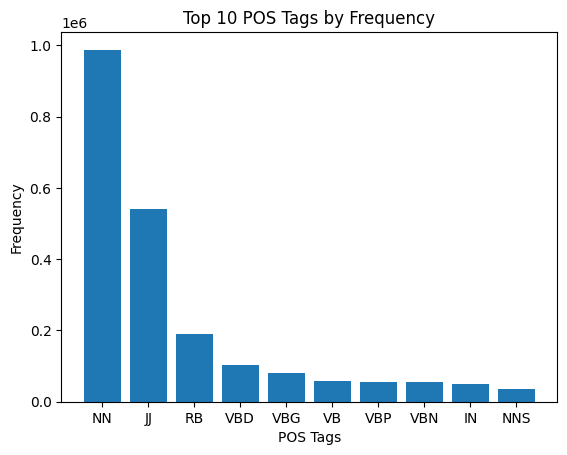

In [34]:
# Get the top 10 most frequent POS tags
top_10_tags = pos_freq.most_common(10)

# Display the top 10 tags and their frequencies
print("Top 10 POS Tags and Frequencies:")
for tag, freq in top_10_tags:
    print(f"{tag}: {freq}")

# visualisation 
import matplotlib.pyplot as plt

# Separate tags and frequencies for plotting
tags, frequencies = zip(*top_10_tags)

# Plot the bar chart
plt.bar(tags, frequencies)
plt.title("Top 10 POS Tags by Frequency")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.show()

#### (c) Analyze the common word combinations and patterns surrounding the most frequent POS tags (e.g., "adjective + noun", "verb + prepositional phrase"). 

Top 10 most common combinations:
NN + NN : 414710
JJ + NN : 344602
NN + JJ : 179702
JJ + JJ : 105236
NN + RB : 88792
RB + JJ : 73749
NN + VBD : 71163
VBD + JJ : 46438
NN + VBG : 38351
VBG + NN : 36395


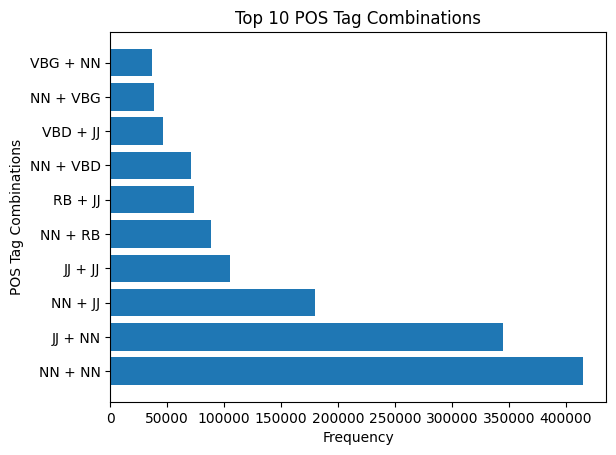

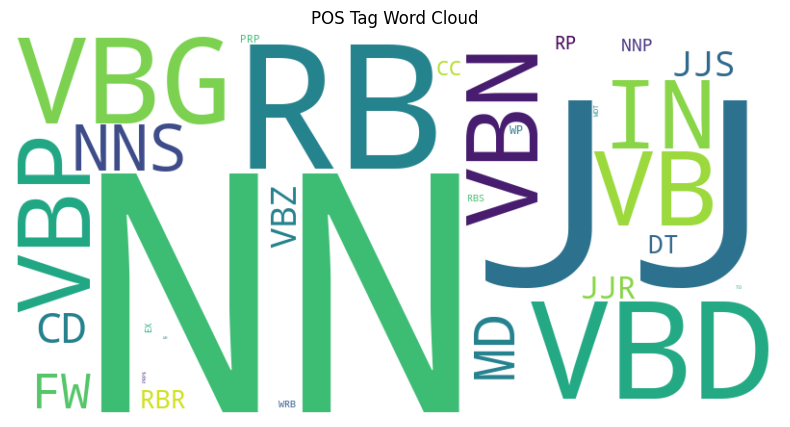

In [38]:
# Extract adjacent POS tag combinations
def extract_combinations(tagged_sentence):
    combinations=[]
    for i in range(len(tagged_sentence) - 1):
        combinations.append(f"{tagged_sentence[i][1]} + {tagged_sentence[i+1][1]}")
    return combinations

# get all combinations from the dataset
all_combinations = []
for row in data["pos_tags"]:
    all_combinations.extend(extract_combinations(row))

# count the frequency of each combinations
comb_freq = Counter(all_combinations)

# Display the most common combinations
top_combinations = comb_freq.most_common(10)
print("Top 10 most common combinations:")
for combo, freq in top_combinations:
    print(f"{combo} : {freq}")

# Visualization
# Separate combinations and frequencies for plotting
combinations, comb_frequencies = zip(*top_combinations)

# Plot the bar chart
plt.barh(combinations, comb_frequencies)
plt.title("Top 10 POS Tag Combinations")
plt.xlabel("Frequency")
plt.ylabel("POS Tag Combinations")
plt.show()


!pip install wordcloud
from wordcloud import WordCloud

# Generate a word cloud from POS tag frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pos_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("POS Tag Word Cloud")
plt.show()

### Display the HMM POS tagging on the first 4 rows of the dataset 

In [39]:
import nltk
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.corpus import treebank

# Ensure required resources are available
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [42]:
# Get the tagged sentences from the Treebank corpus with the Universal Tagset
tagged_sentences = treebank.tagged_sents(tagset='universal')

# Initialize HMM trainer
trainer = HiddenMarkovModelTrainer()

# Train the HMM tagger
hmm_tagger = trainer.train(tagged_sentences)


# Extract the first 4 rows of normalized comments
first_4_rows = data['normalized_comments'][:4]

# Tokenize and apply the HMM tagger
hmm_pos_tags = first_4_rows.apply(lambda text: hmm_tagger.tag(nltk.word_tokenize(text)))

# Display the results
for i, (text, tags) in enumerate(zip(first_4_rows, hmm_pos_tags)):
    print(f"Row {i+1}:")
    print(f"Original Text: {text}")
    print(f"HMM POS Tags: {tags}")
    print("-" * 50)


Row 1:
Original Text: stay islam place really cool good location min away subway min downtown room nice place clean islam managed pretty well arrival even last minute recommand place airbnb user
HMM POS Tags: [('stay', 'VERB'), ('islam', 'NOUN'), ('place', 'NOUN'), ('really', 'NOUN'), ('cool', 'NOUN'), ('good', 'NOUN'), ('location', 'NOUN'), ('min', 'NOUN'), ('away', 'NOUN'), ('subway', 'NOUN'), ('min', 'NOUN'), ('downtown', 'NOUN'), ('room', 'NOUN'), ('nice', 'NOUN'), ('place', 'NOUN'), ('clean', 'NOUN'), ('islam', 'NOUN'), ('managed', 'NOUN'), ('pretty', 'NOUN'), ('well', 'NOUN'), ('arrival', 'NOUN'), ('even', 'NOUN'), ('last', 'NOUN'), ('minute', 'NOUN'), ('recommand', 'NOUN'), ('place', 'NOUN'), ('airbnb', 'NOUN'), ('user', 'NOUN')]
--------------------------------------------------
Row 2:
Original Text: great location airport city great amenity house plus islam always helpful even though away
HMM POS Tags: [('great', 'ADJ'), ('location', 'NOUN'), ('airport', 'NOUN'), ('city', 'NOU

#### a) Choose a subset of the dataset (e.g., a paragraph or a set of sentences) and apply both POS tagging and NER to this subset.  

In [43]:
import nltk
import spacy

# Ensure required resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load spaCy model for NER
nlp = spacy.load("en_core_web_sm")


# Example subset: First 2 rows from the comments column
subset = data['comments'][:2]
print("Selected Subset:")
print(subset)


# POS tagging function
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    return nltk.pos_tag(tokens)

# Apply POS tagging to the subset
pos_tags = subset.apply(pos_tagging)
print("POS Tags for the Subset:")
for comment, tags in zip(subset, pos_tags):
    print(f"Comment: {comment}")
    print(f"POS Tags: {tags}")
    print("-" * 50)

# NER tagging function
def ner_tagging(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER tagging to the subset
ner_tags = subset.apply(ner_tagging)
print("NER Tags for the Subset:")
for comment, entities in zip(subset, ner_tags):
    print(f"Comment: {comment}")
    print(f"NER Tags: {entities}")
    print("-" * 50)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Selected Subset:
0    My stay at islam's place was really cool! Good...
1    Great location for both airport and city - gre...
Name: comments, dtype: object
POS Tags for the Subset:
Comment: My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)
POS Tags: [('My', 'PRP$'), ('stay', 'NN'), ('at', 'IN'), ('islam', 'NN'), ("'s", 'POS'), ('place', 'NN'), ('was', 'VBD'), ('really', 'RB'), ('cool', 'JJ'), ('!', '.'), ('Good', 'JJ'), ('location', 'NN'), (',', ','), ('5min', 'CD'), ('away', 'RB'), ('from', 'IN'), ('subway', 'NN'), (',', ','), ('then', 'RB'), ('10min', 'CD'), ('from', 'IN'), ('downtown', 'NN'), ('.', '.'), ('The', 'DT'), ('room', 'NN'), ('was', 'VBD'), ('nice', 'JJ'), (',', ','), ('all', 'DT'), ('place', 'NN'), ('was', 'VBD'), ('clean', 'JJ'), ('.', '.'), ('Islam', 'NNP'), (

#### (b) Create a table that displays each word in the subset along with its POS tag and NER tag (if applicable). 

In [45]:
def ner_tagging(text):
    doc = nlp(text)
    # Create a dictionary mapping each word to its NER label
    return {ent.text: ent.label_ for ent in doc.ents}

# Process each comment in the subset
results = []
for comment in subset:
    pos_tags = pos_tagging(comment)
    ner_tags = ner_tagging(comment)
    
    # Combine POS and NER tags for each word
    for word, pos in pos_tags:
        ner = ner_tags.get(word, None)  # Retrieve NER tag if it exists
        results.append({'Word': word, 'POS': pos, 'NER': ner})

# Convert results into a DataFrame
result_df = pd.DataFrame(results)

# Display the combined table
print(result_df)

      Word   POS   NER
0       My  PRP$  None
1     stay    NN  None
2       at    IN  None
3    islam    NN   ORG
4       's   POS  None
..     ...   ...   ...
79    even    RB  None
80  though    IN  None
81      he   PRP  None
82     was   VBD  None
83    away    RB  None

[84 rows x 3 columns]


#### (c) Identify the instances where POS tags and NER tags appear to contradict each other or provide mutually supportive information. Justify how these observed relationships can be leveraged to enhance the accuracy and depth of text analysis tasks                                               (3 Marks)


In [46]:
# Analyze contradictions and mutual support
contradictions = []
mutual_support = []

for _, row in result_df.iterrows():
    pos = row['POS']
    ner = row['NER']
    
    # Contradictions: POS and NER suggest conflicting information
    if pos in ['NN', 'NNS'] and ner in ['PERSON', 'DATE', 'ORG']:
        contradictions.append({'Word': row['Word'], 'POS': pos, 'NER': ner, 'Type': 'Contradiction'})
    
    # Mutual support: POS and NER reinforce each other
    if pos in ['NNP'] and ner in ['PERSON', 'ORG', 'GPE']:
        mutual_support.append({'Word': row['Word'], 'POS': pos, 'NER': ner, 'Type': 'Mutual Support'})

# Convert results to DataFrames for display
contradictions_df = pd.DataFrame(contradictions)
mutual_support_df = pd.DataFrame(mutual_support)

print("Contradictions:")
print(contradictions_df)

print("\nMutual Support:")
print(mutual_support_df)


Contradictions:
    Word POS  NER           Type
0  islam  NN  ORG  Contradiction

Mutual Support:
    Word  POS  NER            Type
0  Islam  NNP  ORG  Mutual Support
1  Islam  NNP  ORG  Mutual Support


Here’s the content formatted properly for Markdown:

---

# **Justification for Observed Relationships**

## **1. Contradictions**

### **Example**:
- **Word**: `"islam"`
- **POS**: `NN` (common noun)
- **NER**: `ORG` (organization)

### **Issue**:
The POS tag (`NN`) suggests a general noun, while the NER tag (`ORG`) identifies it as a specific named entity. This mismatch can cause confusion in downstream tasks that rely on both POS and NER, such as text summarization or entity extraction.

### **Resolution**:
Contradictions can highlight ambiguities in the text, such as when proper nouns are incorrectly tokenized as lowercase (`islam` vs. `Islam`). Incorporating context-aware mechanisms, such as capitalization rules or dependency parsing, can help resolve these conflicts.

### **How This Helps**:
Identifying contradictions ensures improved accuracy in **entity linking** and **semantic role labeling** by correcting POS tags for named entities. For example, recognizing `"Islam"` as an organization (if relevant in context) helps categorize it correctly in domain-specific tasks.

---

## **2. Mutual Support**

### **Example**:
- **Word**: `"Islam"`
- **POS**: `NNP` (proper noun)
- **NER**: `ORG` (organization)

### **Strength**:
POS and NER mutually reinforce the identification of `"Islam"` as a proper noun (`NNP`) and a named entity (`ORG`). This consistency confirms that the entity is significant in the context of the text.

### **How This Helps**:
Mutual support ensures greater confidence in the identification of entities and improves downstream tasks:

- **Entity Recognition Accuracy**:  
  Proper nouns that align with NER tags can be more confidently classified, enhancing systems like **knowledge graphs** or **entity-based search engines**.

- **Contextual Analysis**:  
  Agreement between POS and NER supports better sentence-level semantics. For instance, identifying `"Islam"` as an organization allows NLP pipelines to generate more meaningful summaries.

---

## **Applications of Leveraging These Relationships**

### **1. Improved Contextual Understanding**:
- Contradictions can act as red flags for ambiguity, prompting additional analysis or corrections.
- Mutual support can prioritize high-confidence relationships for tasks like machine translation or sentiment analysis.

### **2. Enhanced Named Entity Disambiguation**:
Combining consistent POS and NER tags improves the system’s ability to disambiguate entities, reducing errors in domain-specific models (e.g., recognizing `"Islam"` as an organization in geopolitical texts).

### **3. Robust NLP Pipelines**:
- Using contradictions to flag preprocessing issues (e.g., case sensitivity, tokenization) can improve the robustness of NLP workflows.
- Mutual support ensures reliable extraction of key entities for applications like document classification or entity linking.

---

## **Conclusion**

By analyzing contradictions and mutual support between POS and NER tags:
- **Contradictions** highlight ambiguities, guiding refinements in text processing.
- **Mutual Support** strengthens confidence in accurate text interpretations.  

Together, these insights can enhance the **accuracy**, **depth**, and **context-awareness** of text analysis tasks.



## Justification of the output obtained for all the above tasks is mandatory